### Adhlere Coffy
### PUI HW5 - Task 1
### October 20, 2015

In [1]:
#Geopandas runs rough on here so had to do it the old fashioned way and pull the csv directly from the url
import os
import pandas as pd
import numpy as np
import json
import statsmodels.api as sm
import urllib2
import pylab as pl
%pylab inline

s = json.load(open(os.getenv('PUI2015') + '/fbb_matplotlibrc.json'))
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#Pull the energy data off of the NYC open data site
FileURL = 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD'
openFile = urllib2.urlopen(FileURL)
dfEnergy = pd.read_csv(openFile)

In [3]:
print dfEnergy.columns

Index([u'Record Number', u'NYC Borough, Block, and Lot (BBL)',
       u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [4]:
#Pull corresponding PLUTO map off my dropbox. No changes needed, public folder
urlPLUTO = 'https://www.dropbox.com/s/y95p6bw9uzx70bh/MnPLUTOData.csv?dl=1'
openPLUTOFile = urllib2.urlopen(urlPLUTO)
dfBUnits = pd.read_csv(openPLUTOFile) #use the PLUTO data only for Building Units

In [5]:
print dfBUnits.columns

Index([u'FID', u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'Address', u'ZoneDist1', u'ZoneDist2', u'ZoneDist3',
       u'ZoneDist4', u'Overlay1', u'Overlay2', u'SPDist1', u'SPDist2',
       u'LtdHeight', u'AllZoning1', u'AllZoning2', u'SplitZone', u'BldgClass',
       u'LandUse', u'Easements', u'OwnerType', u'OwnerName', u'LotArea',
       u'BldgArea', u'ComArea', u'ResArea', u'OfficeArea', u'RetailArea',
       u'GarageArea', u'StrgeArea', u'FactryArea', u'OtherArea', u'AreaSource',
       u'NumBldgs', u'NumFloors', u'UnitsRes', u'UnitsTotal', u'LotFront',
       u'LotDepth', u'BldgFront', u'BldgDepth', u'Ext', u'ProxCode',
       u'IrrLotCode', u'LotType', u'BsmtCode', u'AssessLand', u'AssessTot',
       u'ExemptLand', u'ExemptTot', u'YearBuilt', u'BuiltCode', u'YearAlter1',
       u'YearAlter2', u'HistDist', u'Landmark', u'BuiltFAR', u'ResidFAR',
       u'CommFAR', u'Facil

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109a8e6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cf8b050>]], dtype=object)

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


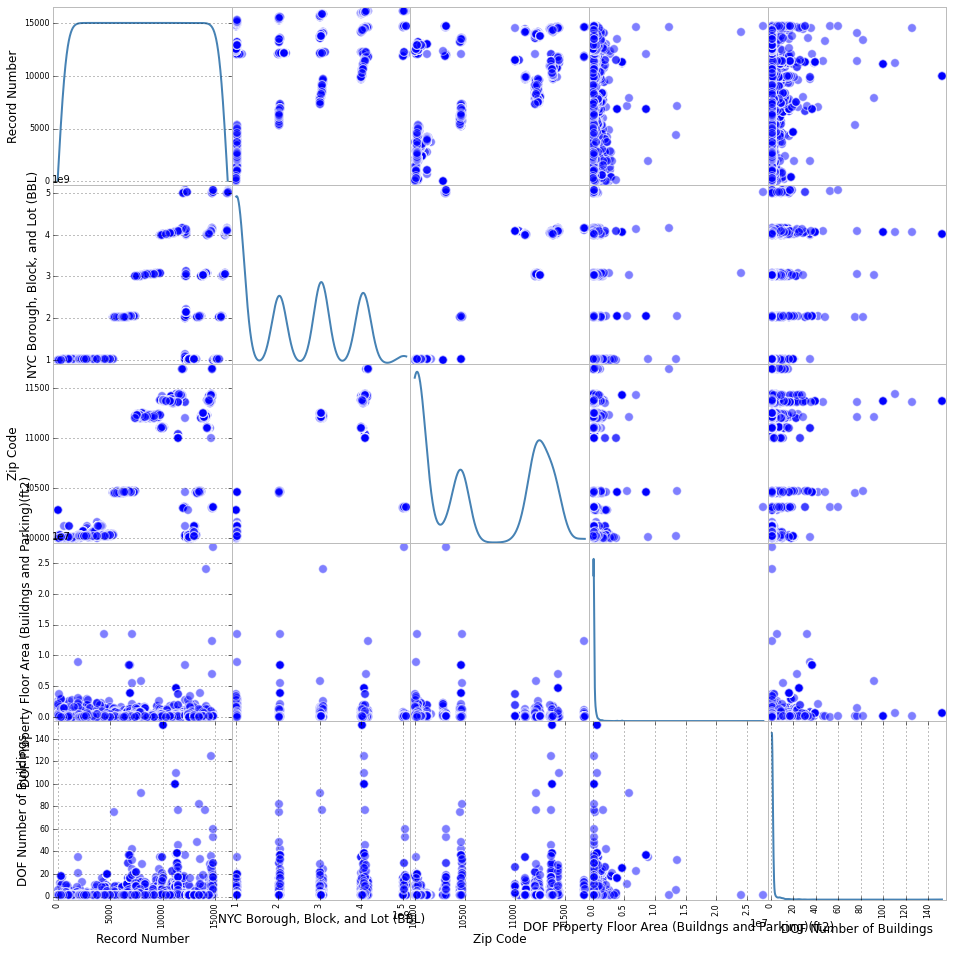

In [6]:
from pandas.tools.plotting import scatter_matrix

#Was trying to figure out a way to use 'if not' to skip the Record Number column
#if dfEnergy.columns is not 'Record Number':
scatter_matrix (dfEnergy, s=300, figsize=(16, 16), diagonal='kde')

In [7]:
#defining the canconvert function that will evaluate whether or not a value can be converted to float
def canconvert(mydata):
    try:
        float(mydata)
        return True
    except ValueError:
        return False

#The vectorize function will loop through an array it is fed (in this case a column of data) and execute the canconvert function
floats = np.vectorize(canconvert)

In [8]:
#So the arrays created here will be made of boolean evaluations of convertability. They will later be used as index values
indxEnergy = floats(dfEnergy['Site EUI(kBtu/ft2)'])
indxArea = floats(dfEnergy['Reported Property Floor Area (Building(s)) (ft²)'])

In [9]:
#confirm that the arrays contain evaluations of convertability (is that a word?)
#print "Energy Values: ", indxEnergy[1:50]
#print "Area Values: ", indxArea[1:50]

In [10]:
#Here you take all the values that failed the convert eval (returned False) and convert them to NaNs
dfEnergy['Site EUI(kBtu/ft2)'][~indxEnergy] = float('NaN')
dfEnergy['Reported Property Floor Area (Building(s)) (ft²)'][~indxArea] = float('NaN')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [11]:
#Visual check that the conversion worked
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
#notice you can use the attribute notation to refer to columns in dfBUnits (PLUTO map file),
#cause the column names do not have spaces!

#print dfEnergy['Site EUI(kBtu/ft2)'].astype(float)
#print dfEnergy['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
#print dfBUnits.BBL.astype(float)
#print dfBUnits.UnitsTotal.astype(float)

In [12]:
#Now in order to merge the datasets so that you can calculate and plot energy use vs. building
#you have use the common column of locators, Borough, Block and Lot (BBL)

dfEnergy['BBL'] = dfEnergy['NYC Borough, Block, and Lot (BBL)'].astype(float)
BldEngyMerge = pd.merge(dfEnergy, dfBUnits, on='BBL')
#print BldEngyMerge.columns #print to confirm successful merge

In [13]:
#Calculating the total 
BldEngyMerge['Total Energy (kBtu)'] = BldEngyMerge['Site EUI(kBtu/ft2)'].astype(float) \
* BldEngyMerge['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
#print BldEngyMerge['Total Energy (kBtu)'] #print to make sure there are no errors during the arithmatic operation

### Basic Scatterplot

(-10000000000.0, 80000000000.0)

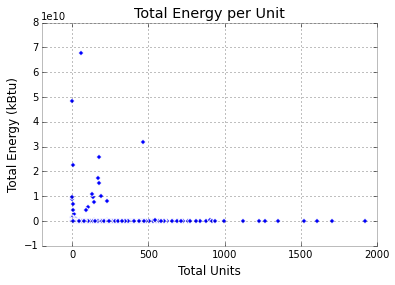

In [14]:
UnitsVsEnergy = pl.scatter(BldEngyMerge['UnitsTotal'], BldEngyMerge['Total Energy (kBtu)'])
xlabel('Total Units')
ylabel('Total Energy (kBtu)')
title('Total Energy per Unit')
xlim(-200, 2000)
ylim(-1e10, 8e10)

Scatter plot of Total Units vs Total Energy Use

### Log Scatterplot

(1000, 10000000000.0)

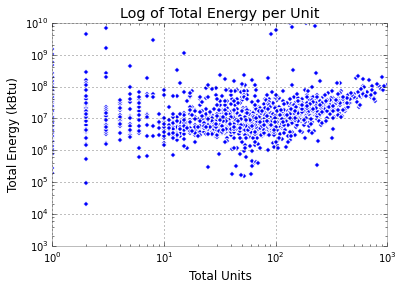

In [15]:
BldEngyMerge.plot(kind='scatter', x='UnitsTotal', y='Total Energy (kBtu)', loglog = True)
xlabel('Total Units')
ylabel('Total Energy (kBtu)')
title('Log of Total Energy per Unit')
xlim(1,1000)
ylim(1000,1e10)

Scatter plot of Log Values for Total Units and Total Energy Use

In [16]:
#Here you remove the outliers that will have too much of a negative influence on the dataset
BldEngyCut = BldEngyMerge[(BldEngyMerge['Total Energy (kBtu)'] > 1000) & (BldEngyMerge['Total Energy (kBtu)'] < 
                       1e9) & (BldEngyMerge['UnitsTotal']>0) & (BldEngyMerge['UnitsTotal']<1500)]

(1000, 10000000000.0)

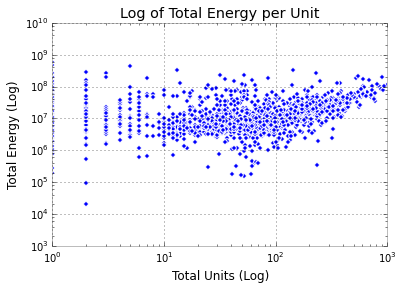

In [17]:
#Redo the log scatter plot with the outliers removed
BldEngyCut.plot(kind='scatter', x='UnitsTotal', y='Total Energy (kBtu)', loglog = True)
xlabel('Total Units (Log)')
ylabel('Total Energy (Log)')
title('Log of Total Energy per Unit')
xlim(1,1000)
ylim(1000,1e10)

                             OLS Regression Results                            
Dep. Variable:     Total Energy (kBtu)   R-squared:                       0.025
Model:                             OLS   Adj. R-squared:                  0.025
Method:                  Least Squares   F-statistic:                     54.11
Date:                 Mon, 19 Oct 2015   Prob (F-statistic):           2.69e-13
Time:                         22:01:52   Log-Likelihood:                -1240.2
No. Observations:                 2113   AIC:                             2484.
Df Residuals:                     2111   BIC:                             2496.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.8649      0.025    275.40

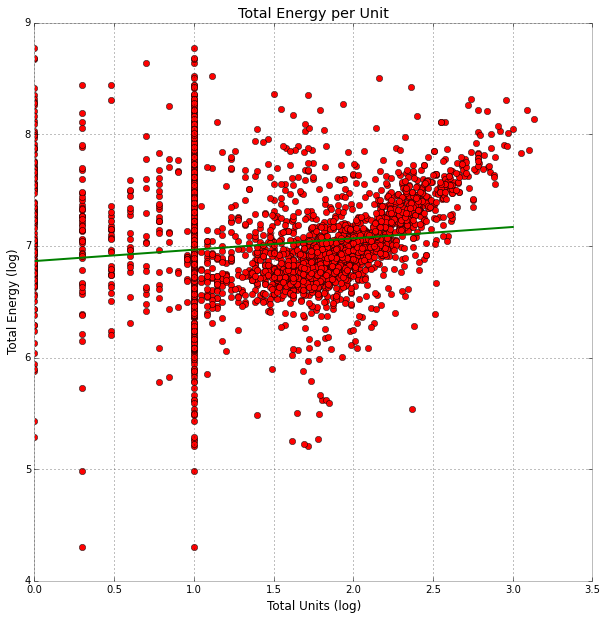

In [18]:
#Keeping with the Log values, Conduct the OLS using Logs
y = (BldEngyCut['Total Energy (kBtu)'])
x = BldEngyCut['UnitsTotal']

xlog = sm.add_constant(np.log10(x))
ylog = np.log10(y) 

BldEngyReg1 = sm.OLS(ylog, xlog, missing='drop').fit()
print BldEngyReg1.summary()

#Plot Configuration
fig1 = figure(figsize = (10,10))
fig1.add_subplot(111)
plot(xlog, ylog, 'ro')
title('Total Energy per Unit')
xlabel('Total Units (log)')
ylabel('Total Energy (log)')

#Fitting a line to the scatter plot
xlineplot = np.arange(0, 4, 1)
ylineplot = (BldEngyReg1.params)[1]*xlineplot + (BldEngyReg1.params)[0]
plot(xlineplot, ylineplot, 'green')


                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     54.11
Date:                Mon, 19 Oct 2015   Prob (F-statistic):           2.69e-13
Time:                        22:01:57   Log-Likelihood:                -2169.8
No. Observations:                2113   AIC:                             4344.
Df Residuals:                    2111   BIC:                             4355.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                  -0.0610    

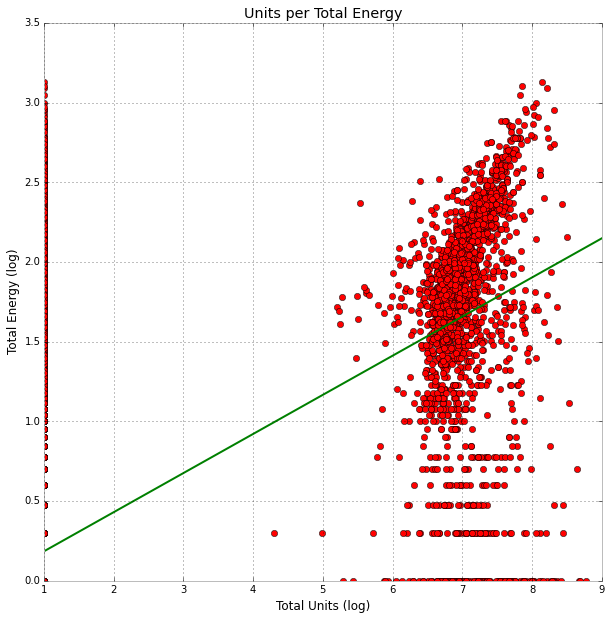

In [19]:
#Chart inversion to see if things fit better
xlog2 = sm.add_constant(np.log10(y))
ylog2 = np.log10(x) 

BldEngyReg2 = sm.OLS(ylog2, xlog2, missing='drop').fit()
print BldEngyReg2.summary()

#Plot Configuration
fig2 = figure(figsize = (10,10))
fig2.add_subplot(111)
plot(xlog2, ylog2, 'ro')
title('Units per Total Energy')
xlabel('Total Units (log)')
ylabel('Total Energy (log)')

#Fitting a line to the scatter plot
xplot2 = np.arange(1, 10, 1)
yplot2 = (BldEngyReg2.params)[1]*xplot2 + (BldEngyReg2.params)[0]
plot(xplot2, yplot2, 'green')

                             OLS Regression Results                            
Dep. Variable:     Total Energy (kBtu)   R-squared:                       0.859
Model:                             OLS   Adj. R-squared:                  0.859
Method:                  Least Squares   F-statistic:                 1.289e+04
Date:                 Mon, 19 Oct 2015   Prob (F-statistic):               0.00
Time:                         22:12:24   Log-Likelihood:                -5053.1
No. Observations:                 2113   AIC:                         1.011e+04
Df Residuals:                     2112   BIC:                         1.011e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
UnitsTotal     3.6279      0.032    113.53

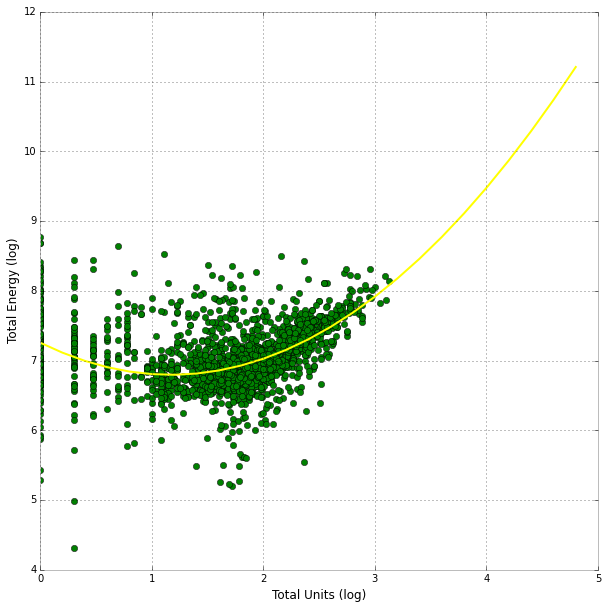

In [20]:
#The second degree curve fit

curve = np.polyfit(x, y, 2)
xlog3 = np.log10(x)
ylog3 = np.log10(y)

BldEngyReg3 = sm.OLS(ylog3, xlog3, missing='drop').fit()
print BldEngyReg3.summary()

#least squares polynomial fit with 2 degrees of freedom
BldEngyReg4 = np.polyfit(xlog3, ylog3, 2)

#Fitting the second degree curve
fig3 = figure(figsize = (10,10))
fig3.add_subplot(111)
plot(xlog3, ylog3, 'go')
xplot3 = np.arange(0, 5, .2)
yplot3 = BldEngyReg4[0]*xplot3**2 + BldEngyReg4[1]*xplot3 + BldEngyReg4[2]
plot (xplot3, yplot3, 'yellow')
xlabel('Total Units (log)')
ylabel('Total Energy (log)')

A second order expression captures the variations in the results better than a linear fit. Comparatively the R-squared values indicate that the regressions have improved by virtue of capturing the relationship between the data better.